In [5]:
import numpy as np
import pandas as pd
import random
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
from keras import layers, models, callbacks
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

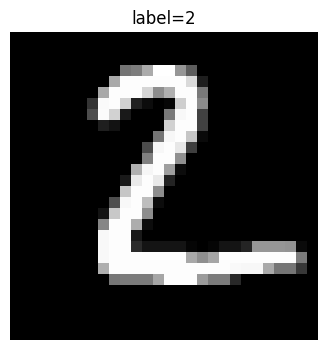

In [7]:
idx = 1  # change this index to view a different test image
img = test_images[idx]
label = test_labels[idx]

# If images have a channel dimension (e.g. (28,28,1)), squeeze it:
if img.ndim == 3 and img.shape[-1] == 1:
    img = img.squeeze(-1)

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f"label={label}")
plt.axis('off')
plt.show()

In [8]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=5, batch_size=64, callbacks=[callbacks.EarlyStopping(patience=3)], verbose=1)

Epoch 1/5
938/938 [==============================] - 23s 23ms/step - loss: 0.1789 - accuracy: 0.9440
Epoch 2/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0469 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0331 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0250 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0196 - accuracy: 0.9941


In [15]:
from PIL import Image

In [16]:
def load_image_for_mnist(path, target_size=(28, 28)):
    img = Image.open(path).convert('L') # convert image into grayscale 'L' mode
    img = img.resize(target_size, Image.BILINEAR) # resize image
    arr = np.array(img).astype('float32') / 255.0 # convert the image into a numpy array
    arr = 1.0 - arr # invert the colors -> white text on black background
    arr = arr.reshape(1, target_size[0], target_size[1], 1) # input shape for the model 

    return arr


path = "./digit.png"
x = load_image_for_mnist(path)
probs = model.predict(x)
pred_label = np.argmax(probs, axis=1)[0]
print(f"predicted label: {pred_label}")
print(f"probability: {max(probs[0])}")

1/1 [==============================] - 0s 121ms/step
predicted label: 4
probability: 0.9118717312812805
